In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [63]:
animes_overall = pd.read_csv("/kaggle/input/anime-recommendations-database/anime.csv")
ratings = pd.read_csv("/kaggle/input/anime-recommendations-database/rating.csv")
animes_overall.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [15]:
animes_overall.dropna(inplace=True)
animes_overall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


# Frequência de cada gênero

In [23]:
animes_overall.head()
contador = []
for i in animes_overall['genre']:
    for j in i.split(','):
        j = j.strip()
        contador.append(j)
generos = Counter(contador)
generos = pd.Series(generos)
generos = generos.to_frame().reset_index()
generos.columns = ['genero', "count"]
generos.sort_values(by='count', ignore_index = True, inplace=True, ascending = False)
generos.tail()

,genero,count
38,Shounen Ai,62
39,Shoujo Ai,54
40,Josei,52
41,Yuri,41
42,Yaoi,38


<Axes: xlabel='count', ylabel='genero'>

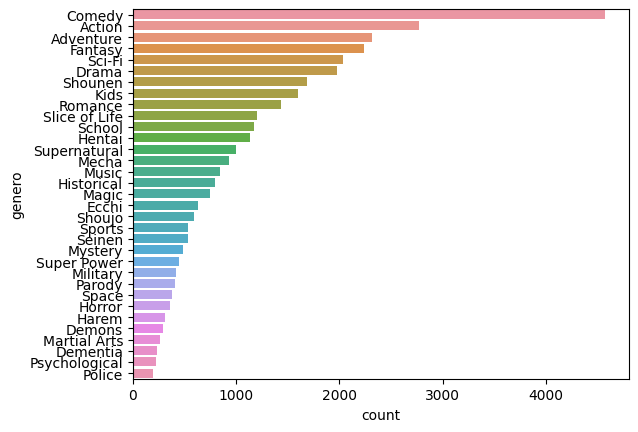

In [50]:
sns.barplot(data=generos, y='genero', x='count', order = generos['genero'][0:-10])

# Quantidade de episódios